In [1]:
#Step 1: Loading the input data from the MNIST database
#Goal: Access the dataset of MNIST containing a training set of 60'000 examples, and a test set of 20'000 examples.

# Tensorflow allow us to import and download the MNIST dataset directly from their API
import tensorflow as tf

# The dataset is organized as a tuple of numpy arrays and split in training and test data for both the image data (X) and the labels (y)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# To reduce the time of computation we limited our datasets to the following number of observations: 
# training set = 2000 and testing = 500.
x_train=x_train[:2000]
y_train=y_train[:2000]
x_test=x_test[:500]
y_test=y_test[:500]

# Print the `digits` data
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [2]:
# Step 2: Exploring the characteristics of the input data
# Goal: Gathering some insights into the data by performing an exploratory data analysis (EDA)


import numpy as np

# Inspect the shape of training set images (x_train)
print(x_train.shape) #2'000 samples of 2 dimensional 28*28 pixel images of digits 0-9

# Inspect the shape of testing set images (x_test)
print(x_test.shape) #500 samples of 2 dimensional 28*28 pixel images of digits 0-9

# Inspect the shape of training set labels (y_train)
print(y_train.shape) #corresponding labels

# Print the number of labels
print(len(np.unique(y_train))) #=10, from 0 to 9

# Transform the 2 dimensional planer image into 1 dimensional array for latter analysis;
# 784 columns, one for each pixel (28*28)
x_train_data=x_train.reshape((2000,784)) 
x_test_data=x_test.reshape((500,784))

# Inspect the shape of the transformed training set arrays (x_train_data, x_test_data)
print(x_train_data.shape) #2000 samples of 1 dimensional 784 (28*28) pixel array of digits 0-9
print(x_test_data.shape) #500 samples of 1 dimensional 784 (28*28) pixel array of digits 0-9

(2000, 28, 28)
(500, 28, 28)
(2000,)
10
(2000, 784)
(500, 784)


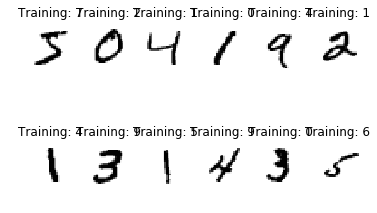

In [3]:
# Step 3: Visualizing target images with the matplotlib library
# Goal: Show the handwritten digits together with their correspnding labels 
# Remark: Since the dataset for training and testing are already splitted, 
# the subsequent plotting will only focus on the training set, as it contains more samples (2'000 vs 500)

# Import matplotlib
import matplotlib.pyplot as plt 
# To show plots within a Jupyter Notebook
%matplotlib inline

# Join the images and target labels in a list
images_and_labels = list(zip(x_train, y_test))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:12]):
    # initialize a subplot of 2X6 at the i+1-th position
    plt.subplot(2, 6, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [4]:
# Step 4: Principal Component Analysis (PCA) = Dimensionality reduction technique
# Goal: Reducing the dimensionality to grasp and visualize the data more easily 
# Remark: PCA is a linear transformation method that yields the directions (principal components), that maximize the variance of the data.

from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2,svd_solver='randomized')

# Fit and transform the data to the model
# The number of samples are limited to 1000 in order to make the dots on PCA Scatter Plot more distinguishable
reduced_data_rpca = randomized_pca.fit_transform(x_train_data[:1000])

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(x_train_data[:1000])

# Inspect the shape
print(reduced_data_pca.shape) #784 columns are reduced into only 2 columns

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

(1000, 2)
[[ 203.11771527  337.55487445]
 [1105.17585236  425.75432693]
 [  10.38438569 -417.45904039]
 ...
 [ 767.8009733   193.55486812]
 [ 148.16581321  621.10611946]
 [-203.14972938  166.29119966]]
[[ 203.1191349   337.57018929]
 [1105.17328955  425.71330415]
 [  10.38562891 -417.4040607 ]
 ...
 [ 767.80440388  193.61761115]
 [ 148.16402083  621.11406428]
 [-203.14777582  166.33146843]]


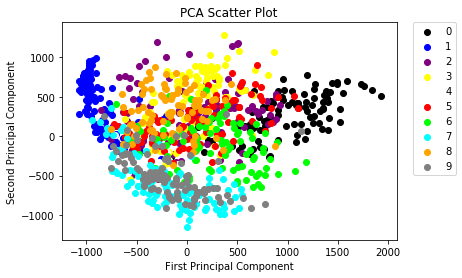

In [5]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][y_train[:1000] == i]
    y = reduced_data_rpca[:, 1][y_train[:1000] == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(list(set(y_train)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()


# A fair amount of overlaps can be obeserved on the resulting scatter plot.
# This suggests that certain digits are similar and that the clustering methodology might not be suited to classify the digits

In [6]:
# Step 5: Optimization of classifier parameters using the GridSearchCV method 
# Goal: Decide on kernal and the value of C and gamma

#Import SVM model
from sklearn import svm

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
#The grid search generates candidates from a grid of parameter values specified with the param_grid parameter. 
#It specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], 
#and the second one with an RBF kernel, and the cross-product of C values 
#ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(x_train_data, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)

print('Best `gamma`:',clf.best_estimator_.gamma)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for training data: 0.878
Best `C`: 1
Best kernel: linear
Best `gamma`: auto_deprecated


In [7]:
# Step 6: Classification with the Support Vector Machine (SVM) algorithm which is a supervised machine learning algorithm
# Goal: Perform classification by finding the hyperplane that differentiate the two classes very well (even multi-class
# classification is based on binary classification).
# Remark: We create an instance of SVM and fit out data. We tune the operation of svm() with 2 additional arguments: gamma and C (cost), 
# where gamma is the argument for use by the kernel function (with low gamma (0.001) points that are far away from plausible seperation 
# line are also considered in the calculation for the seperation line), and cost allows us to specify the cost of a violation to the margin 
# (in our algorithm we use moderate cost).

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=1., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(x_train_data, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(x_test_data, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=1, kernel='linear', gamma=0.001).fit(x_train_data, y_train).score(x_test_data, y_test)

# 89,2% accuracy is obtained which can be explained by good performance of our classification model

0.892

In [9]:
# Step 7: Predicting the labels
# Goal: Verify if the model predict the right values

# Predict the label of `X_test`
print(svc_model.predict(x_test_data))

# Print `y_test` to check the results
print(y_test)

# By comparing the predicitions with the true values, we can conclude that the classification performance 
# is quite good, especially compared to that in K Means algorithm

[7 2 1 0 4 1 4 9 2 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 2 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 9 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 4 0 5 8 5 6 6 5 2 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 4 9 2 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 1 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 7 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 7 7 9 2 2 4 1 5 5 8 7 2 5 0 6 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 3 1 0 1 5 0 5 0 1 9 9 9 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 6 2 1 2 4 0 2 7 4 5 3 0 0 5 1 9 6 5 2 5 7 7 9 3 5 4 2 0 7 1 1 2 1
 5 3 2 4 7 0 6 5 4 1 3 5 1 0 5 1 3 1 5 3 6 1 8 5 1 9 9 4 6 7 2 5 0 6 5 6 3
 7 2 2 8 8 5 9 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 9 2 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 7 8 3 7 6 0 0 3 0
 8 0 6 4 3 5 3 3 2 3 9 1 2 6 8 0 9 6 6 6 7 8 8 2 2 5 8 9 6 1 8 4 1 2 8 3 1
 9 7 7 4 0 4 9 7 1 0 5 2 

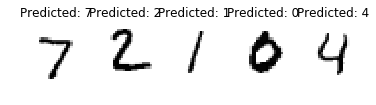

In [10]:
# Step 8: Visualizing classification
# Goal: Verify visually if the classification has been successful


# Import matplotlib
import matplotlib.pyplot as plt

# Assign the predicted values to `predicted`
predicted = svc_model.predict(x_test_data)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(x_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 5, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

# Images are distinguishable

In [11]:
# Step 9: Confusion matrix
# Goal: Analyze the degree of correctness of the model’s predictions

# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

# Comparing with K Means model it's clear that SVM prediction model performs better since the entries in the diagonal
# are substantially larger than the other values in the given row. 40 out of 42 zeros were correctly classified and so on. 
# The number of misclassification is not that big. 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.99      1.00      0.99        67
           2       0.85      0.93      0.89        55
           3       0.88      0.80      0.84        45
           4       0.89      0.93      0.91        55
           5       0.81      0.86      0.83        50
           6       0.95      0.88      0.92        43
           7       0.81      0.90      0.85        49
           8       0.94      0.78      0.85        40
           9       0.88      0.83      0.86        54

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

[[40  0  1  0  0  1  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  1  0  0  2  1  0]
 [ 0  1  1 36  0  5  0  2  0  0]
 [ 0  0  0  0 51  0  2  0  0  2]
 [ 0  0  1  2  0 43  0  2  1  1]
 [ 1  0  2  0  1  1 38  0  0  0]
 [ 0  0  3

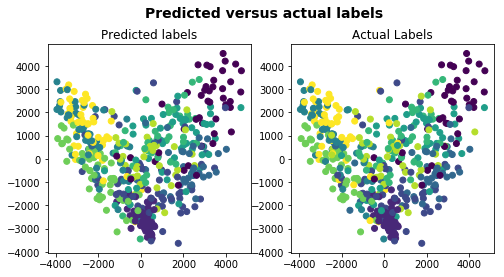

In [12]:
# Step 10: Visualizing predictions with Isomap
# Goal: Use the Isomap to visually verify the performance of the model

#Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
# The number of samples are limited to 1000 in order to make the dots on PCA Scatter Plot more distinguishable
X_iso = Isomap(n_neighbors=10).fit_transform(x_test_data)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_test)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

#  The distribution of the colors is quite similar, meaning that our model classifies well